# Unsupervised outliers detection (event detection)

In [1]:
import drama as drm
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", message='default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.')
warnings.filterwarnings("ignore", message='Data with input dtype float64 was converted to bool by check_pairwise_arrays.')
warnings.filterwarnings("ignore", message='Invalid value encountered in percentile')

Instructions for updating:
Use the retry module or similar alternatives.


## Signal synthesis

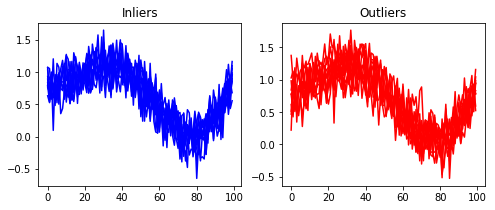

In [2]:
i_sig = 1 # signal number
n_ftrs = 100 
noise = 0.2
scl = 0.01
sft = 0.01

X, y = drm.synt_event(i_sig,n_ftrs,sigma = noise,n1 = scl,n2 = sft,n3 = scl,n4 = sft)

gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(8,3)) 
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax1.set_title('Inliers')
ax2.set_title('Outliers')

inliers = X[y==0]
outliers = X[y==1]
for i in range(10):
    ax1.plot(inliers[i],'b')
    ax2.plot(outliers[i],'r')

In [3]:
# rocs,mccs,rwss,conf = drm.grid_run_lof(X,y)

# rocs,mccs,rwss,conf = drm.grid_run_iforest(X,y)

rocs,mccs,rwss,conf = drm.grid_run_drama(X,y,n_split=2)

/home/gf/packages/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [6]:
np.max(rocs)

0.971635

In [7]:
conf[np.argmax(rocs)]

array(['real', 'AE', 'cityblock', '0'], dtype='<U11')

In [2]:
import numpy as np
import drama as drm
import warnings
warnings.filterwarnings("ignore", message='default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.')
warnings.filterwarnings("ignore", message='Data with input dtype float64 was converted to bool by check_pairwise_arrays.')
warnings.filterwarnings("ignore", message='Invalid value encountered in percentile')

n_ftrs = 100 
noise = 0.3
scl = 0.00
sft = 0.00

i_sig = 1
n_train = 1
nn = 1
    
X, y = drm.synt_event(i_sig,n_ftrs,
                      n_inlier=1000,n_outlier=50,
                      sigma = noise,n1 = scl,
                      n2 = sft,n3 = scl,n4 = sft)                       
y = y[:,None] 

if n_train==0:

    dd = drm.grid_run_drama(X_seen=X,y_seen=y)
    ll = drm.grid_run_lof(X_seen=X,y_seen=y)
    ii = drm.grid_run_iforest(X_seen=X,y_seen=y)
    
iinds = np.argwhere(y[:,0]==0)[:,0]
oinds = np.argwhere(y[:,0]==1)[:,0]
nhalf = iinds.shape[0]//2

np.random.shuffle(iinds)
np.random.shuffle(oinds)

X_train = np.concatenate([X[iinds[:nhalf]],X[oinds[:n_train]]],axis=0)
y_train = np.concatenate([y[iinds[:nhalf]],y[oinds[:n_train]]],axis=0)
X_test = np.concatenate([X[iinds[:]],X[oinds[n_train:]]],axis=0)
y_test = np.concatenate([y[iinds[:]],y[oinds[n_train:]]],axis=0)

X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

# dd = drm.grid_run_drama(X_seen=X_train ,y_seen=y_train ,X_unseen=X_test, y_unseen=y_test, n_split=1)
ll = drm.grid_run_lof(X_seen=X_train ,y_seen=y_train ,X_unseen=X_test, y_unseen=y_test)
# ii = drm.grid_run_iforest(X_seen=X_train ,y_seen=y_train ,X_unseen=X_test, y_unseen=y_test)


ValueError: Metric 'pyfunc' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a callable function.